In [1]:
import numpy as np
import itertools as it
from random import randint
from time import time
import matplotlib.pyplot as plt

In [2]:
class KnapSack:
  def __init__(self, profits, weights, capacity):
    self.profits = profits
    self.weights = weights
    self.capacity = capacity
    self.size = weights.size

  def solve_knapsack_brute_force(self):
    best_ans = 0
    final_w = 0
    final_idx = []
    perm = list(it.product([0,1], repeat=self.size))
    for i in perm:
      temp_p = 0
      temp_w = 0
      idx = 0
      for j in i:
        if j == 1:
          temp_w += self.weights[idx]
          if temp_w < self.capacity:
            temp_p += self.profits[idx]
        idx += 1
      if best_ans < temp_p:
        best_ans = max(best_ans, temp_p)
        final_w = temp_w
        final_idx = i
    msg = f"Należy zabrać przedmioty: {final_idx} o łącznej wadze {final_w} i wartości {best_ans}"
    return msg



  def solve_knapsack_pw_ratio(self):
    pw_ratio = []
    weights = self.weights
    profits = self.profits
    for i in range(self.size):
      pw_ratio.append(profits[i] / weights[i])
    temp_w = 0
    final_w = 0
    final_p = 0
    final_idx = []
    while temp_w < self.capacity:
      if len(pw_ratio) == 0:
        break
      biggest_pw = max(pw_ratio)
      i = pw_ratio.index(biggest_pw)
      temp_w += weights[i]
      if temp_w <= self.capacity:
        final_w = temp_w
        final_p += profits[i]
        final_idx.append(i+1)
      pw_ratio.remove(biggest_pw)
      weights = np.delete(weights, i)
      profits = np.delete(profits, i)
    final_idx.sort()
    msg = f"Należy zabrać przedmioty: {final_idx} o łącznej wadze {final_w} i wartości {final_p}"
    return msg

In [3]:
def brute_force_plot():
  weights = np.array([])
  profits = np.array([])
  capacity = 10
  times = []
  for _ in range(20):
      weights = np.append(weights, [randint(1, 20)])
      profits = np.append(profits, [randint(1, 20)])
      plecak = KnapSack(profits, weights, capacity)
      start = time()
      plecak.solve_knapsack_brute_force()
      end = time()
      times.append(end - start)
  # fig, ax = plt.subplots()

  plt.scatter(range(1, 21), times)
  plt.ylabel('Czas uzyskania wyniku')
  plt.xlabel('Ilość elementów do wyboru')
  # ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
  #      ylim=(0, 8), yticks=np.arange(1, 8))

  plt.show()


def pw_ratio_plot():
  weights = np.array([])
  profits = np.array([])
  capacity = 10
  times = []
  for i in range(20):
      weights = np.append(weights, [randint(1, 20)])
      profits = np.append(profits, [randint(1, 20)])
      plecak = KnapSack(profits, weights, capacity)
      start = time()
      plecak.solve_knapsack_pw_ratio()
      end = time()
      times.append(end - start)
  # fig, ax = plt.subplots()

  plt.scatter(range(1, 21), times)
  plt.ylabel('Czas uzyskania wyniku')
  plt.xlabel('Ilość elementów do wyboru')

  # ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
  #      ylim=(0, 8), yticks=np.arange(1, 8))

  plt.show()

In [4]:
weights = np.array([8, 3, 5, 2])
capacity = 9
profits = np.array([16, 8, 9, 6])

In [5]:
plecak = KnapSack(profits, weights, capacity)
print(plecak.solve_knapsack_brute_force())
print(plecak.solve_knapsack_pw_ratio())

Należy zabrać przedmioty: (0, 1, 1, 0) o łącznej wadze 8 i wartości 17
Należy zabrać przedmioty: [2, 4] o łącznej wadze 5 i wartości 14


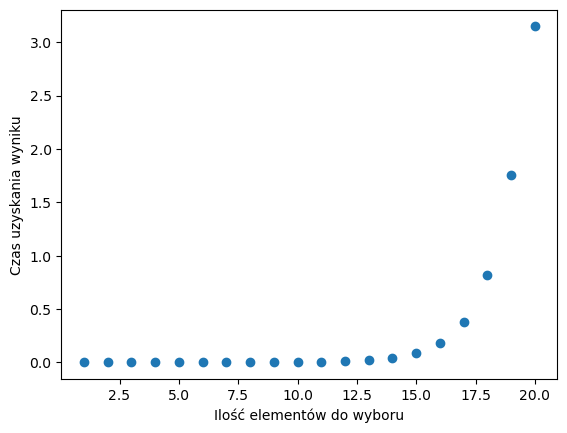

In [6]:
brute_force_plot()
# pw_ratio_plot()

Czy obie metody mają takie same rozwiązania? 
Nie, algorytmy są różne i różnie działają. Brute force będzie zwracał poprawne wyniki jednak przy większej ilości elementów czas wykonania programu rośnie eksponencjalnie. Natomiast heurystyka rozważająca stosunek zysku do wagi nie ma pewności poprawnego wyniku, ale czas znalezienia wyniku rośnie liniowo o ilości elementów w plecaku. 


Jakie są Pani / Pana wnioski?
Jeśli musimy mieć pewność poprawnego wyniku musimy skorzystać z algorytmu brute force. Jednak jeśli bardziej nam zależy na czasie uzyskania wyniku i optymalizacji zużycia mocy obliczeniowej, powinniśmy skorzystać z dobrze dobranej heurystyki. 